# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [18]:
import seaborn as sns
import pandas as pd

In [19]:
# Your code here.
student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Age': [17, 51, 27, 21,36, 48, 19, 26, 54, 30],
                            'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

StudentID  Age  Tardies
0          1   17       10
1          2   51        1
2          3   27        5
3          4   21        9
4          5   36        4
5          6   48        2
6          7   19        9
7          8   26        6
8          9   54        0
9         10   30        3

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

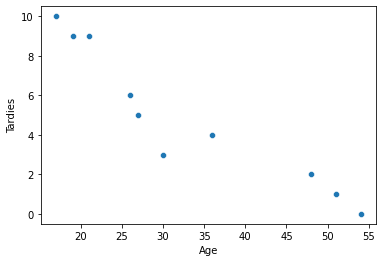

In [20]:
# Your code here.
sns.scatterplot(data=student_data, x="Age", y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### There is a negative realtionship between age and no. of tardies 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [21]:
# Your response here.
student_data.cov()

StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444

In [22]:
student_data.corr()

StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:
from scipy import stats
X = student_data['Age']
Y = student_data["Tardies"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [30]:
import statsmodels.api as sm

X = sm.add_constant(student_data.Age)
Y = student_data.Tardies

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           5.57e-05
Time:                        13:07:43   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\manu2\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           5.57e-05
Time:                        13:08:21   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

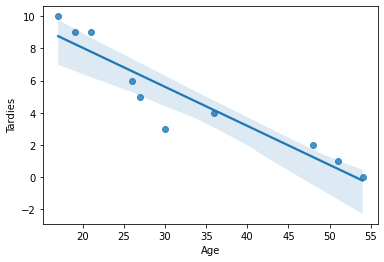

In [33]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
'''
The r-square value is equal to 0.88, which means that the model descibres 88% od the data, which is good. 
Additionaly the low values of p-values indicates the null hypothesis is rejected and there is significance of the model.
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [35]:
# Import any libraries you may need & the data
import seaborn as sns
import pandas as pd
data = pd.read_csv("vehicles.csv")

In [37]:
data.head()

Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          19.388824        18           17            17   
1   Regular          25.354615        13           13            13   
2   Regular          20.600625        16           17            16   
3   Regular          25.354615        13           13            13   
4   Premium          20.600625        14           21            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100  
3               683.615385            2550  
4               555.437500            2550

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [39]:
# Your response here. 
corr =data[['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']].corr()
corr

CO2 Emission Grams/Mile      Year  Cylinders  \
CO2 Emission Grams/Mile                 1.000000 -0.222300   0.752393   
Year                                   -0.222300  1.000000   0.082469   
Cylinders                               0.752393  0.082469   1.000000   
Fuel Barrels/Year                       0.986189 -0.221084   0.739517   
Combined MPG                           -0.926229  0.204751  -0.698648   
Fuel Cost/Year                          0.930865 -0.091913   0.778153   

                         Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  
CO2 Emission Grams/Mile           0.986189     -0.926229        0.930865  
Year                             -0.221084      0.204751       -0.091913  
Cylinders                         0.739517     -0.698648        0.778153  
Fuel Barrels/Year                 1.000000     -0.909743        0.916208  
Combined MPG                     -0.909743      1.000000       -0.875185  
Fuel Cost/Year                    0.916208     -0.875185        1.000000

<AxesSubplot:>

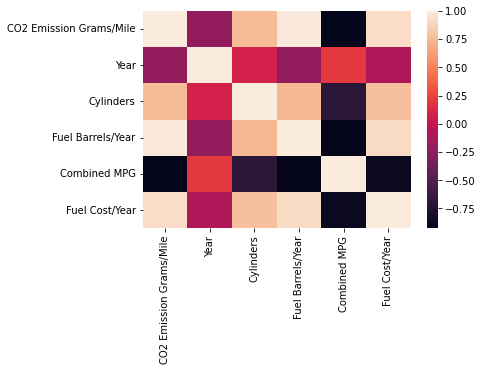

In [40]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 
X = sm.add_constant(data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])
Y = data['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                             13:16:23   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [44]:
# Your code here. 
parties = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

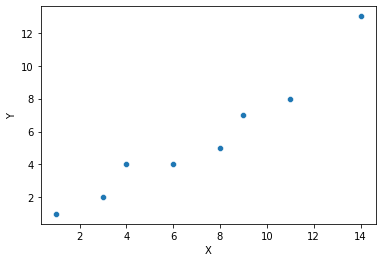

In [46]:
# Your code here.
sns.scatterplot(x='X',y='Y',data=parties)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

##### Comments
It seems that there is a linear realtionship between the variables. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [47]:
# Your response here. 
parties.corr()

X        Y
X  1.00000  0.96523
Y  0.96523  1.00000

In [49]:
X = sm.add_constant(parties.X) 
Y = parties.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           0.000102
Time:                        14:06:59   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\manu2\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='X', ylabel='Y'>

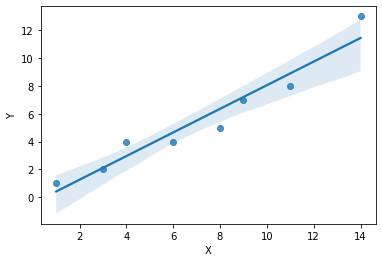

In [50]:
sns.regplot(x="X", y="Y", data=parties)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?


#### If we drop the outlier the relation will be more significant. 